In [1]:
# Python
import pandas as pd
from prophet import Prophet


In [2]:
# Python
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [3]:
df.tail()

,ds,y
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


In [4]:
df.ds.nunique()

2905

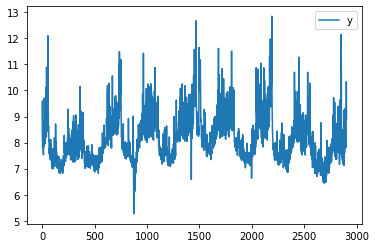

In [5]:
df.plot()

In [6]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'p

In [7]:
# Python
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5mq55irn/2wbjy7x9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5mq55irn/_3bqpsmd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6366', 'data', 'file=/tmp/tmp5mq55irn/2wbjy7x9.json', 'init=/tmp/tmp5mq55irn/_3bqpsmd.json', 'output', 'file=/tmp/tmp5mq55irn/prophet_model3m2q1jaz/prophet_model-20221226080119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:01:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:01:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [8]:
m.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [9]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [10]:
# Python
forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


In [11]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.035820,8.203880,9.442770,8.035820,8.035820,0.802814,0.802814,0.802814,0.352279,0.352279,0.352279,0.450535,0.450535,0.450535,0.0,0.0,0.0,8.838634
1,2007-12-11,8.034297,7.987716,9.202196,8.034297,8.034297,0.552915,0.552915,0.552915,0.119616,0.119616,0.119616,0.433299,0.433299,0.433299,0.0,0.0,0.0,8.587212
2,2007-12-12,8.032774,7.759853,8.969580,8.032774,8.032774,0.350351,0.350351,0.350351,-0.066648,-0.066648,-0.066648,0.416999,0.416999,0.416999,0.0,0.0,0.0,8.383125
3,2007-12-13,8.031250,7.766625,8.956362,8.031250,8.031250,0.329798,0.329798,0.329798,-0.072279,-0.072279,-0.072279,0.402077,0.402077,0.402077,0.0,0.0,0.0,8.361048
4,2007-12-14,8.029727,7.735128,8.946129,8.029727,8.029727,0.319379,0.319379,0.319379,-0.069561,-0.069561,-0.069561,0.388940,0.388940,0.388940,0.0,0.0,0.0,8.349107


In [12]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.208452,7.538065,8.984351
3266,2017-01-16,8.533442,7.861487,9.294175
3267,2017-01-17,8.320853,7.688393,9.076989
3268,2017-01-18,8.153517,7.484128,8.900242
3269,2017-01-19,8.165423,7.468158,8.934279


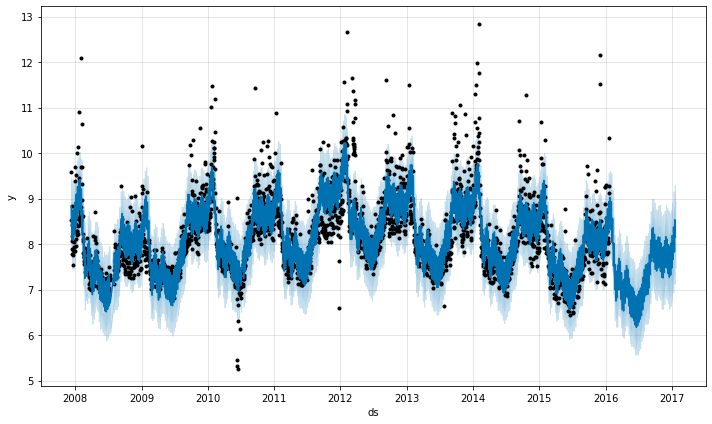

In [13]:
# Python
fig1 = m.plot(forecast)


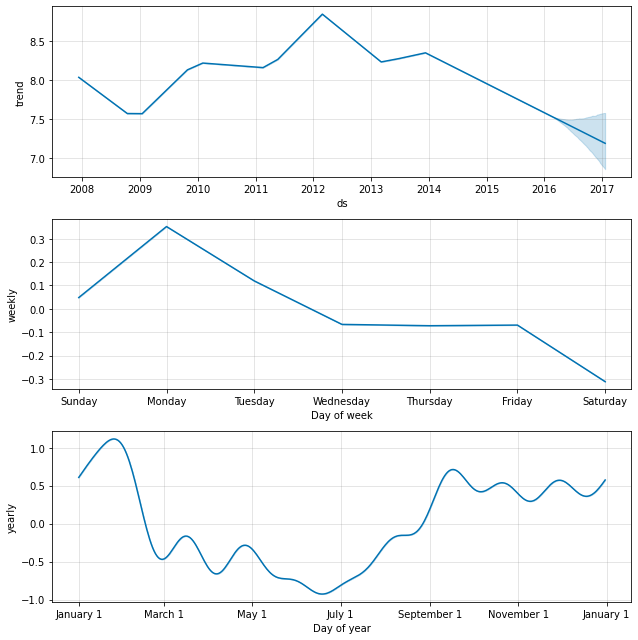

In [14]:
fig2 = m.plot_components(forecast)

In [15]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [16]:
# Python
plot_components_plotly(m, forecast)


In [17]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:prophet:Making 11 forecasts with cutoffs between 2010-02-15 00:00:00 and 2015-01-20 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5mq55irn/635m2md8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5mq55irn/d6d57bh0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91304', 'data', 'file=/tmp/tmp5mq55irn/635m2md8.json', 'init=/tmp/tmp5mq55irn/d6d57bh0.json', 'output', 'file=/tmp/tmp5mq55irn/prophet_modelqlfa2hme/prophet_model-20221226080123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:01:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:01:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5mq55irn/0co5ksgp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5mq55irn/_k5diaeq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-02-16,8.954355,8.446685,9.473664,8.242493,2010-02-15
1,2010-02-17,8.720730,8.209079,9.226805,8.008033,2010-02-15
2,2010-02-18,8.604357,8.089665,9.102761,8.045268,2010-02-15
3,2010-02-19,8.526162,8.002561,9.042126,7.928766,2010-02-15
4,2010-02-20,8.267999,7.773400,8.746744,7.745003,2010-02-15


In [19]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,0.493203,0.702284,0.503793,0.058351,0.049677,0.058664,0.675423
1,38 days,0.499038,0.706426,0.508760,0.058925,0.049585,0.059298,0.672910
2,39 days,0.521223,0.721958,0.514844,0.059523,0.049600,0.060022,0.670169
3,40 days,0.528452,0.726947,0.517657,0.059823,0.049427,0.060392,0.676336
4,41 days,0.535851,0.732018,0.518542,0.059889,0.049585,0.060521,0.683874


/usr/local/lib/python3.8/dist-packages/prophet/plot.py:544: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.8/dist-packages/prophet/plot.py:545: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



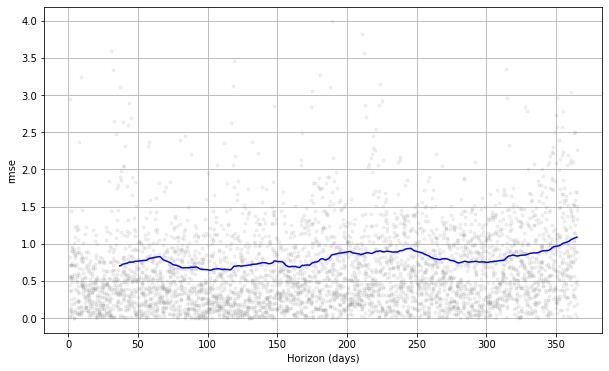

In [20]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

/usr/local/lib/python3.8/dist-packages/prophet/plot.py:544: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.8/dist-packages/prophet/plot.py:545: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



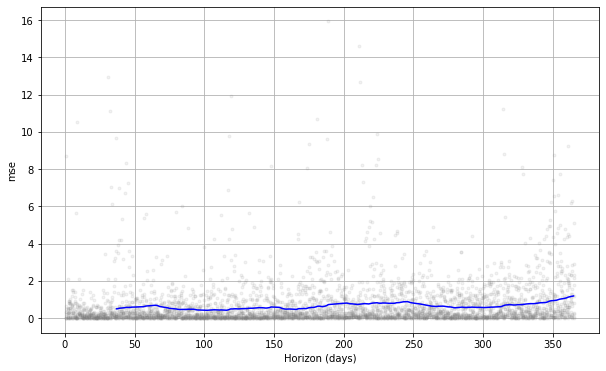

In [21]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mse')

/usr/local/lib/python3.8/dist-packages/prophet/plot.py:544: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.8/dist-packages/prophet/plot.py:545: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



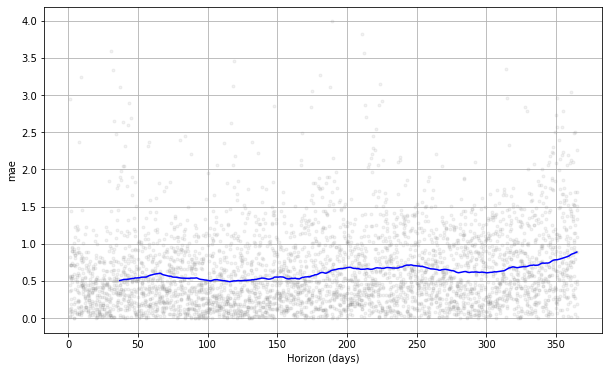

In [22]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')